In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [31]:
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [32]:
df1 = df.copy()

In [33]:
df1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [34]:
df1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [35]:
df1.dtypes

Quarter     object
Sales      float64
dtype: object

In [36]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [37]:
temp = df1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [38]:
df1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [39]:
df1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [40]:
df1 = df1.drop(['Quarter'], axis=1)

In [41]:
df1.reset_index(inplace=True)

In [42]:
df1['quater'] = pd.to_datetime(df1['quater'])

In [43]:
df1 = df1.set_index('quater')

In [44]:
df1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


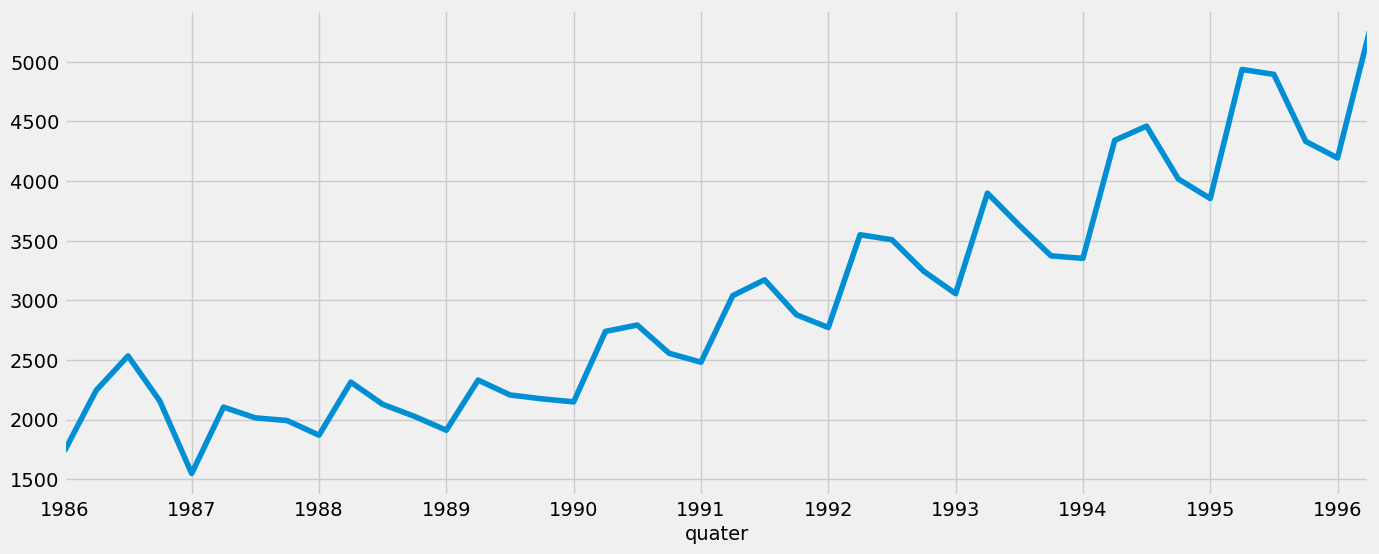

In [45]:
df1['Sales'].plot(figsize=(15, 6))
plt.show()

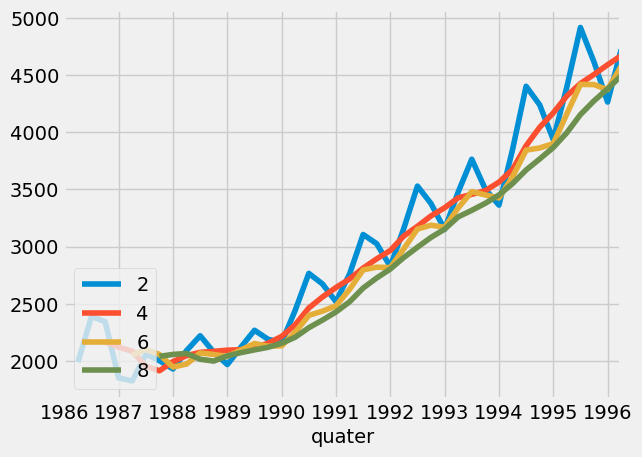

In [46]:
for i in range(2,10,2):
    df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

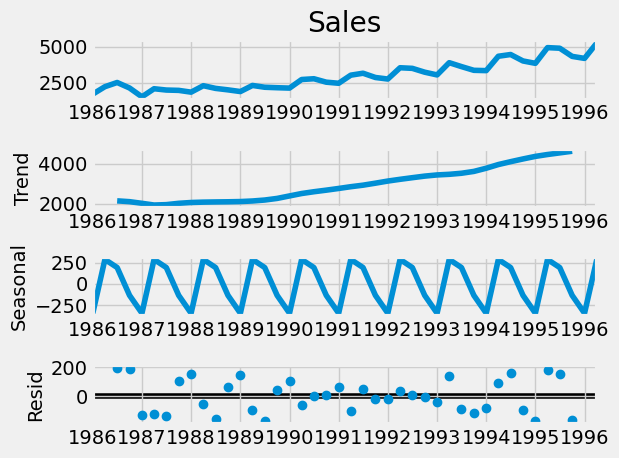

In [47]:
ts_add = seasonal_decompose(df1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

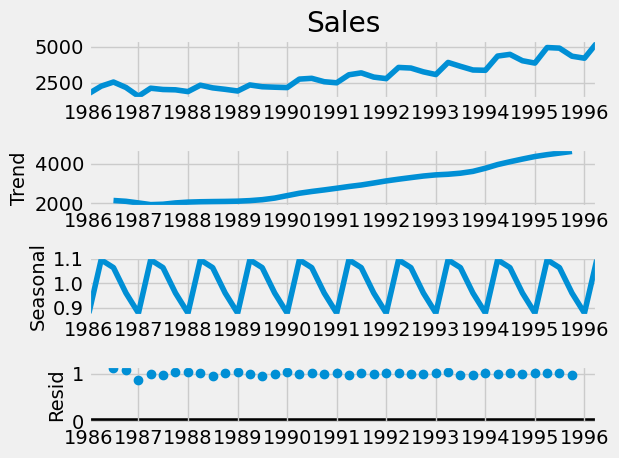

In [48]:
ts_mul = seasonal_decompose(df1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

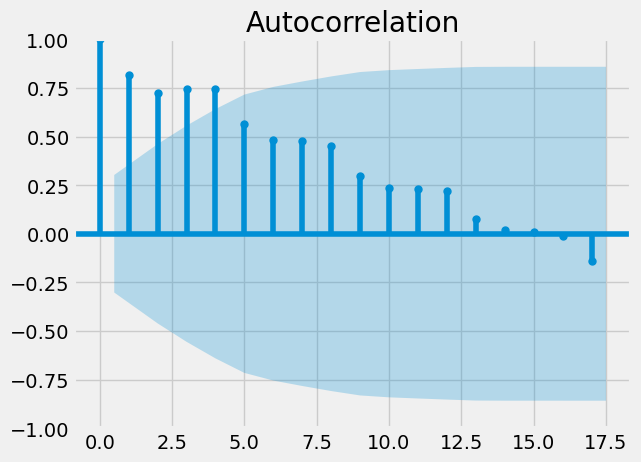

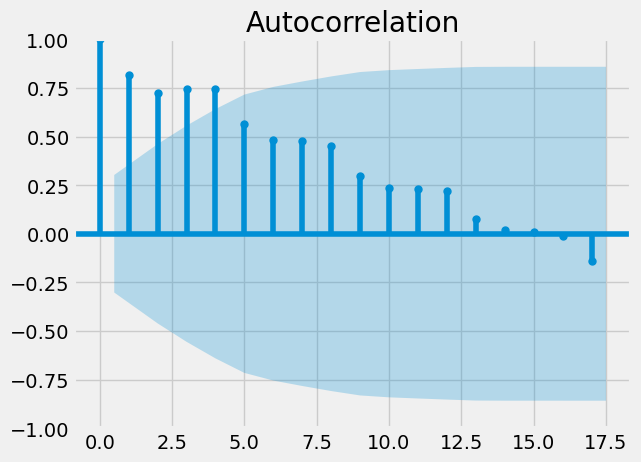

In [49]:
tsa_plots.plot_acf(df1.Sales)

# Building Time series forecasting with ARIMA

In [50]:
X = df1['Sales'].values

In [51]:
size = int(len(X) * 0.66)

In [52]:
train, test = X[0:size], X[size:len(X)]

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [58]:
# Old import statement
from statsmodels.tsa.arima_model import ARIMA

# New import statement
from statsmodels.tsa.arima.model import ARIMA

# create an instance of the ARIMA class
arima_model = ARIMA(train, order=(1, 1, 1))

In [64]:
# Old import statement
from statsmodels.tsa.statespace.sarimax import SARIMAX

# New import statement
from statsmodels.tsa.statespace.sarimax import SARIMAX

# create an instance of the SARIMAX class
sarimax_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

In [65]:
model = ARIMA(train, order=(5,1,0))

In [68]:
# create an instance of the ARIMA class
arima_model = ARIMA(train, order=(1, 1, 1))

# fit the ARIMA model
arima_fit = arima_model.fit()

In [70]:
# create an instance of the ARIMA class
arima_model = ARIMA(train, order=(1, 1, 1))

# fit the ARIMA model
arima_fit = arima_model.fit()

# display the fitting results
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -187.501
Date:                Tue, 04 Apr 2023   AIC                            381.003
Time:                        22:02:46   BIC                            384.777
Sample:                             0   HQIC                           382.089
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2704      0.463      0.584      0.559      -0.637       1.177
ma.L1         -0.6068      0.463     -1.310      0.190      -1.515       0.301
sigma2      1.047e+05   3.09e+04      3.386      0.0

In [73]:
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -187.501
Date:                Tue, 04 Apr 2023   AIC                            381.003
Time:                        22:05:11   BIC                            384.777
Sample:                             0   HQIC                           382.089
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2704      0.463      0.584      0.559      -0.637       1.177
ma.L1         -0.6068      0.463     -1.310      0.190      -1.515       0.301
sigma2      1.047e+05   3.09e+04      3.386      0.0

# This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations

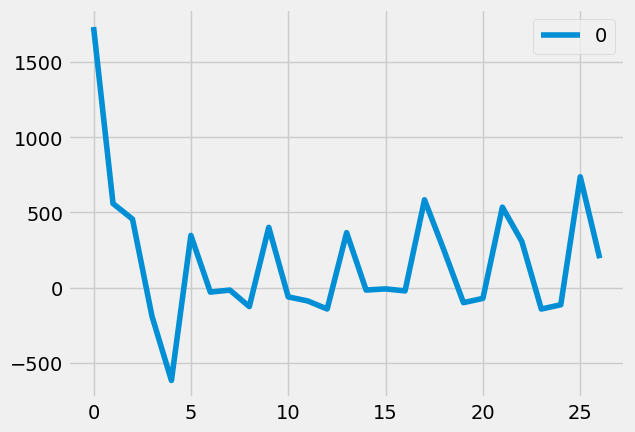

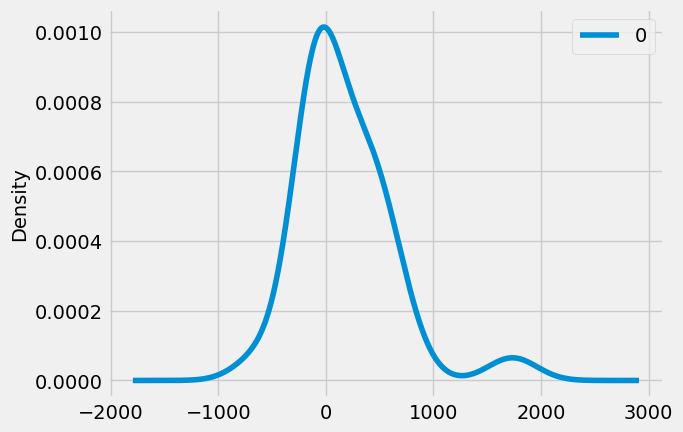

                 0
count    27.000000
mean    174.627963
std     438.752828
min    -618.704149
25%     -94.836699
50%     -16.628755
75%     383.082860
max    1734.827000


In [74]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# The plot of the residual errors suggests that there may still be some trend information not captured by the model ,The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals)

# Rolling Forecast ARIMA Model

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
history = [x for x in train]

In [76]:
predictions = list()

In [80]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	arima_fit = arima_model.fit()
	output = arima_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3378.225183, expected=3243.859993
predicted=3378.225183, expected=3056.000000
predicted=3378.225183, expected=3899.000000
predicted=3378.225183, expected=3629.000000
predicted=3378.225183, expected=3373.000000
predicted=3378.225183, expected=3352.000000
predicted=3378.225183, expected=4342.000000
predicted=3378.225183, expected=4461.000000
predicted=3378.225183, expected=4017.000000
predicted=3378.225183, expected=3854.000000
predicted=3378.225183, expected=4936.000000
predicted=3378.225183, expected=4895.000000
predicted=3378.225183, expected=4333.000000
predicted=3378.225183, expected=4194.000000
predicted=3378.225183, expected=5253.000000


In [81]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 867432.203


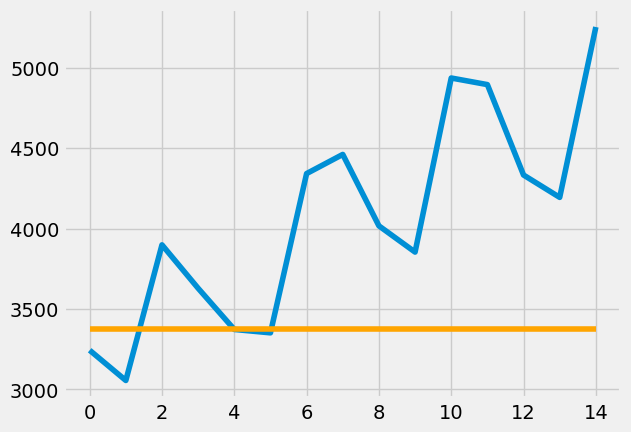

In [82]:
pyplot.plot(test)
pyplot.plot(predictions, color='orange')
pyplot.show()


# Comparing Multiple Models

In [102]:
df2 = pd.get_dummies(df, columns = ['Quarter'])

In [103]:
df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']


In [104]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
t= np.arange(1,43)

In [106]:
df2['t'] = t

In [107]:
df2['t_sq'] = df2['t']*df2['t']

In [108]:
log_Sales=np.log(df2['Sales'])

In [109]:
df2['log_Sales']=log_Sales

In [110]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [111]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])

In [112]:
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918637

In [113]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975037425

In [114]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900183

In [115]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188209186954

In [116]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372528

In [118]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.114443605461

In [119]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.919440795444

In [120]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.687911931751

In [121]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.5619467352553

# Conclusion

In [122]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [123]:
rmse=pd.DataFrame(output)

In [124]:
print(rmse)

           Model       Values
0  rmse_mul_quad  3630.561947
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4       rmseexpo   588.140510
5        rmselin   580.122413
6        rmsemul  2374.919441
7      rmsemulin  5359.687912
8       rmsequad   783.729798
